In [1]:
import pandas as pd
import uproot
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import metrics
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import time
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import auc
from sklearn.utils import shuffle
import matplotlib
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold
import sklearn.metrics

## Реальные данные


In [2]:
data_real = pd.read_csv('/Users/zaret/Desktop/gerda/ANG5_cal.csv')
data_real.drop(data_real.columns[[0]], axis  =1, inplace = True)

data_real = data_real.reset_index()
data_real.drop(data_real.columns[[0]], axis  =1, inplace = True)

In [3]:
data_real = data_real.drop('integral', axis = 1)

for i in range (1,49):
    data_real.drop('integral'+str(i), axis = 1, inplace = True)
    
data_real.drop('derivative49', axis = 1, inplace = True)

In [4]:
data_real

,TimeAtHeightX2,TimeAtHeightX3,TimeAtHeightX4,TimeAtHeightX5,TimeAtHeightX6,TimeAtHeightX7,TimeAtHeightX8,TimeAtHeightX9,TimeAtHeightX10,TimeAtHeightX11,...,derivative40,derivative41,derivative42,derivative43,derivative44,derivative45,derivative46,derivative47,derivative48,label
0,0.140442,0.181663,0.209801,0.233267,0.253996,0.272972,0.290272,0.306565,0.322181,0.337019,...,1.232161,1.138185,1.016946,0.911109,0.814092,0.717761,0.632560,0.550645,0.458908,1
1,0.045344,0.081330,0.112907,0.140417,0.163945,0.185058,0.205364,0.225947,0.247246,0.269007,...,1.798480,1.728344,1.640512,1.447694,1.275357,1.052312,0.801276,0.520466,0.368492,0
2,0.038847,0.068367,0.092965,0.114875,0.136888,0.162010,0.192348,0.225346,0.258546,0.291481,...,1.940569,1.852802,1.768690,1.666881,1.524020,1.316278,1.020917,0.678320,0.434029,0
3,0.040791,0.058287,0.071423,0.082283,0.092036,0.101343,0.110134,0.118823,0.127419,0.135995,...,0.733304,0.741351,0.778511,0.835892,0.851137,0.804447,0.686255,0.485640,0.154488,0
4,0.060938,0.121147,0.198562,0.247046,0.276288,0.299460,0.320231,0.339979,0.359977,0.381197,...,2.579212,2.353233,2.139429,1.917933,1.585219,1.194586,0.811448,0.355208,0.378494,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81597,0.138779,0.191703,0.233328,0.270243,0.302877,0.331684,0.358398,0.382190,0.404193,0.426089,...,3.161253,3.136122,2.765124,2.580866,2.261544,1.787825,1.371110,0.813244,0.355669,1
81598,0.028672,0.058089,0.087452,0.113082,0.136296,0.161095,0.195494,0.240446,0.272500,0.300394,...,1.570048,1.461895,1.384431,1.343391,1.294644,1.189558,0.993786,0.752401,0.462721,1
81599,0.033797,0.064744,0.093734,0.122582,0.157026,0.204316,0.243169,0.269953,0.292775,0.313781,...,2.390365,2.306132,2.193407,2.018752,1.885632,1.708488,1.457672,1.104693,0.593630,1
81600,0.029680,0.047934,0.061086,0.072907,0.081959,0.091011,0.099646,0.106860,0.114075,0.121290,...,1.117350,1.105849,1.086196,1.055546,1.017692,0.892110,0.751582,0.541277,0.096558,1


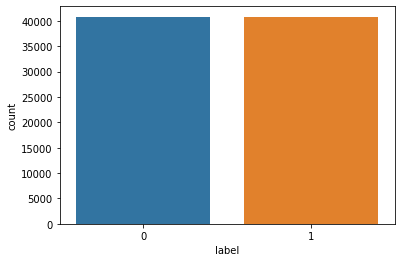

In [5]:
sns.countplot('label', data = data_real)

## Синтезированные данные

In [6]:
data_gen = pd.read_csv('example.csv')
data_gen.drop(data_gen.columns[[0]], axis  =1, inplace = True)

data_gen = data_gen.reset_index()
data_gen.drop(data_gen.columns[[0]], axis  =1, inplace = True)

In [7]:
data_gen.drop('TimeAtHeightX1', axis = 1, inplace = True)
data_gen.drop('TimeAtHeightX50', axis = 1, inplace = True)

In [8]:
data_gen

,TimeAtHeightX2,TimeAtHeightX3,TimeAtHeightX4,TimeAtHeightX5,TimeAtHeightX6,TimeAtHeightX7,TimeAtHeightX8,TimeAtHeightX9,TimeAtHeightX10,TimeAtHeightX11,...,derivative40,derivative41,derivative42,derivative43,derivative44,derivative45,derivative46,derivative47,derivative48,label
0,0.047859,0.084551,0.119299,0.155299,0.188761,0.223149,0.255443,0.288945,0.321843,0.357933,...,1.540579,1.430623,1.270883,1.167746,1.011350,0.843084,0.706976,0.570329,0.470712,1
1,0.066097,0.122598,0.178579,0.227855,0.260765,0.286020,0.308475,0.330446,0.353333,0.377823,...,2.390753,2.195069,2.012476,1.793677,1.571206,1.298550,0.967746,0.624266,0.389749,1
2,0.042451,0.080758,0.109641,0.133549,0.159071,0.185241,0.207271,0.228389,0.250128,0.272917,...,1.877956,1.696454,1.521908,1.332911,1.236557,1.057073,0.906059,0.655561,0.456230,1
3,0.050162,0.081531,0.107799,0.136899,0.165083,0.188978,0.211104,0.232359,0.250481,0.268702,...,1.235579,1.150491,1.049673,1.021887,0.971848,0.864543,0.629699,0.330931,0.235175,1
4,0.051562,0.084981,0.113827,0.140121,0.164231,0.187563,0.209352,0.231103,0.252877,0.276163,...,1.478314,1.358085,1.159338,1.038692,0.872182,0.683760,0.543124,0.450250,0.332624,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105261,0.035229,0.060083,0.080566,0.099828,0.118521,0.137276,0.157294,0.177510,0.197362,0.217133,...,1.819971,1.651582,1.467199,1.182612,0.924744,0.820752,0.780330,0.698185,0.549837,0
105262,0.028220,0.044297,0.056458,0.066501,0.075623,0.084557,0.092995,0.101227,0.108975,0.116525,...,0.682753,0.599837,0.575535,0.451622,0.408759,0.361819,0.399182,0.451672,0.381891,0
105263,0.028212,0.054477,0.076754,0.099435,0.123540,0.150332,0.179216,0.214623,0.247511,0.274846,...,2.079883,2.063659,2.037960,1.720436,1.409806,1.091599,0.771979,0.480613,0.362896,0
105264,0.029620,0.050797,0.067901,0.082770,0.096459,0.109997,0.122814,0.135166,0.146975,0.158749,...,0.784742,0.753556,0.741357,0.638862,0.621169,0.572627,0.553427,0.523062,0.399908,0


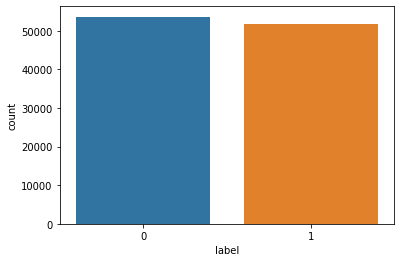

In [9]:
sns.countplot('label', data = data_gen)

## Построение гистограмм, чтобы проверить соответствие синтезированных данных реальным

In [10]:
sig_cal = data_real[data_real['label']==1]
bkg_cal = data_real[data_real['label']==0]

In [11]:
sig_cal = sig_cal.drop('label', axis = 1)
bkg_cal = bkg_cal.drop('label', axis = 1)

In [12]:
sig_gen = data_gen[data_gen['label']==1]
bkg_gen = data_gen[data_gen['label']==0]

sig_gen = sig_gen.drop('label', axis = 1)
bkg_gen = bkg_gen.drop('label', axis = 1)

In [13]:
print(sig_cal.shape)
print(sig_gen.shape)

(40801, 96)
(51633, 96)


In [14]:
bkg_gen

,TimeAtHeightX2,TimeAtHeightX3,TimeAtHeightX4,TimeAtHeightX5,TimeAtHeightX6,TimeAtHeightX7,TimeAtHeightX8,TimeAtHeightX9,TimeAtHeightX10,TimeAtHeightX11,...,derivative39,derivative40,derivative41,derivative42,derivative43,derivative44,derivative45,derivative46,derivative47,derivative48
51633,0.023859,0.044619,0.062495,0.079217,0.095429,0.113411,0.132626,0.151980,0.171468,0.191379,...,2.088145,1.897636,1.888686,1.805619,1.674654,1.466247,1.361048,1.219106,0.938600,0.499712
51634,0.026669,0.040900,0.052281,0.062268,0.071800,0.081810,0.092163,0.102408,0.112209,0.121259,...,0.678692,0.457736,0.706602,0.821297,0.939876,1.110341,1.171321,1.172712,0.999583,0.357541
51635,0.032769,0.053213,0.069115,0.082528,0.094855,0.107039,0.118783,0.130041,0.140515,0.150616,...,1.124353,0.858782,0.824127,0.750994,0.703108,0.668947,0.635555,0.634015,0.551630,0.254814
51636,0.055085,0.078444,0.093737,0.106287,0.117434,0.128306,0.138792,0.149036,0.158411,0.167578,...,1.274457,0.990062,0.788794,0.724011,0.668551,0.665613,0.741406,0.820567,0.843137,0.604139
51637,0.027695,0.048869,0.066450,0.082341,0.097291,0.111993,0.126151,0.140064,0.153483,0.166785,...,1.562915,1.437054,1.338380,1.249572,1.098450,0.952636,0.808585,0.670493,0.491357,0.273691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105261,0.035229,0.060083,0.080566,0.099828,0.118521,0.137276,0.157294,0.177510,0.197362,0.217133,...,2.023286,1.819971,1.651582,1.467199,1.182612,0.924744,0.820752,0.780330,0.698185,0.549837
105262,0.028220,0.044297,0.056458,0.066501,0.075623,0.084557,0.092995,0.101227,0.108975,0.116525,...,0.994247,0.682753,0.599837,0.575535,0.451622,0.408759,0.361819,0.399182,0.451672,0.381891
105263,0.028212,0.054477,0.076754,0.099435,0.123540,0.150332,0.179216,0.214623,0.247511,0.274846,...,2.273998,2.079883,2.063659,2.037960,1.720436,1.409806,1.091599,0.771979,0.480613,0.362896
105264,0.029620,0.050797,0.067901,0.082770,0.096459,0.109997,0.122814,0.135166,0.146975,0.158749,...,0.959059,0.784742,0.753556,0.741357,0.638862,0.621169,0.572627,0.553427,0.523062,0.399908


### Signal

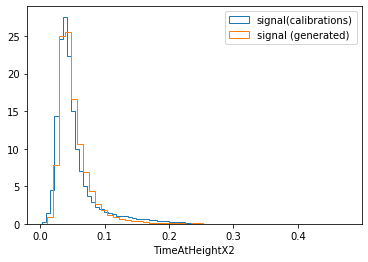

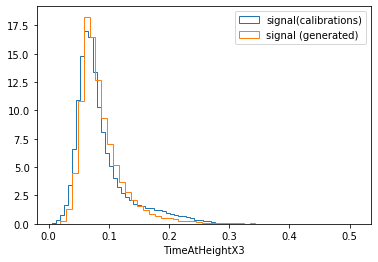

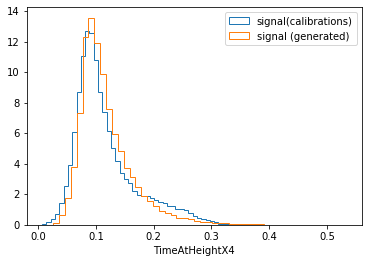

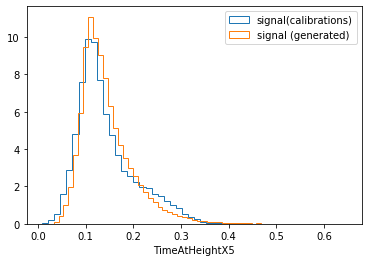

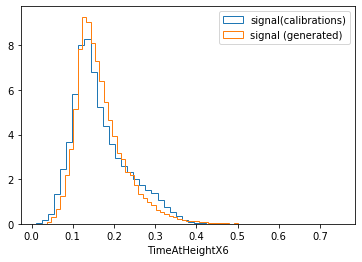

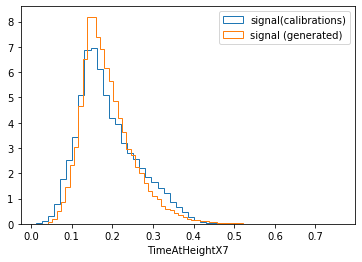

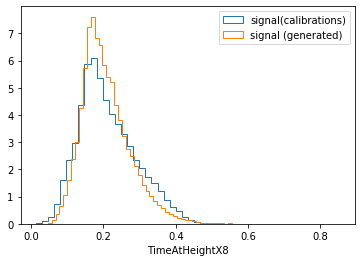

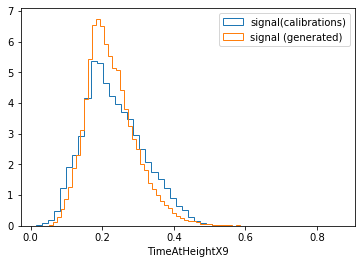

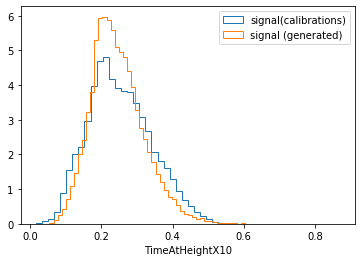

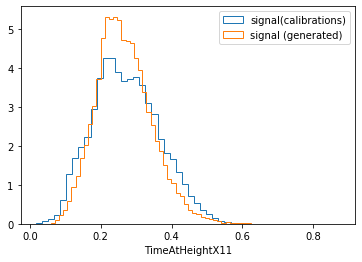

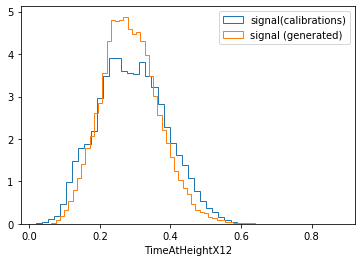

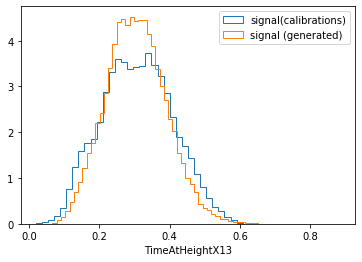

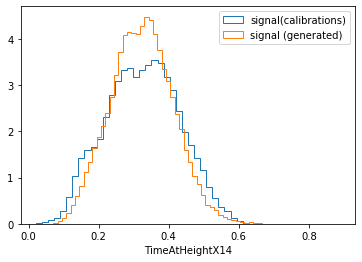

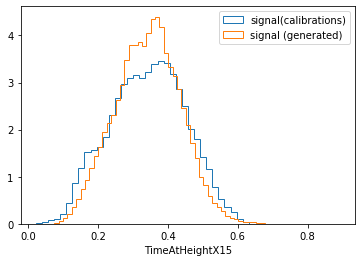

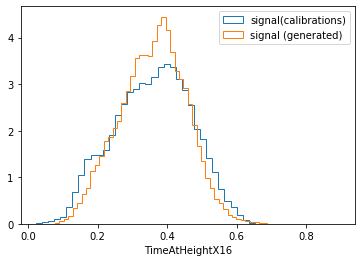

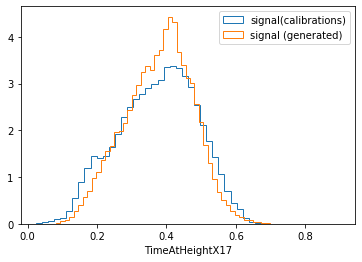

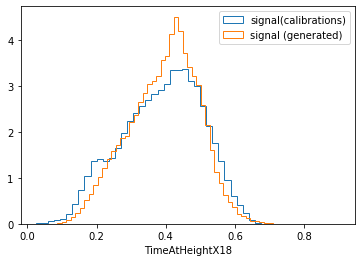

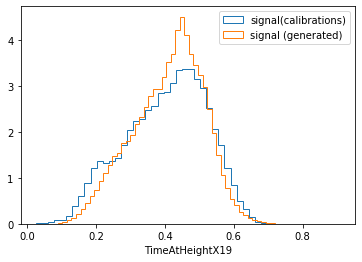

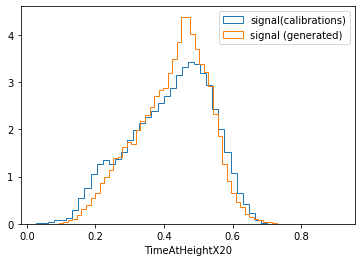

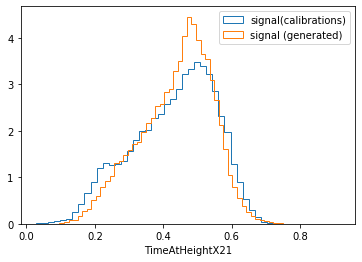

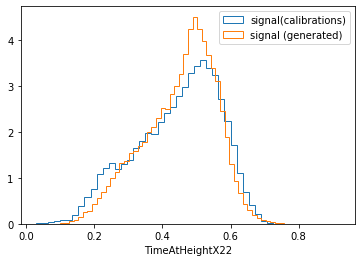

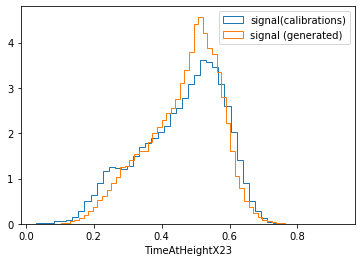

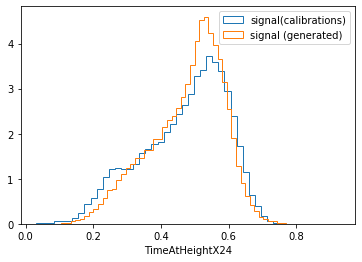

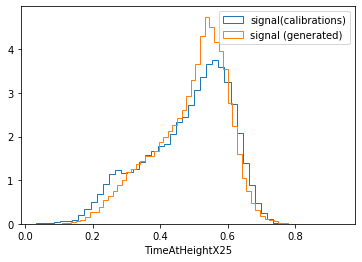

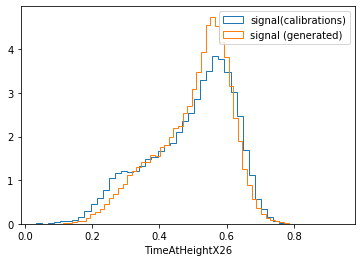

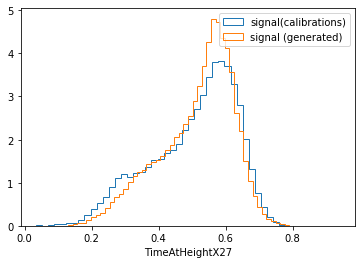

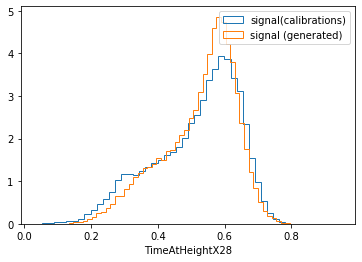

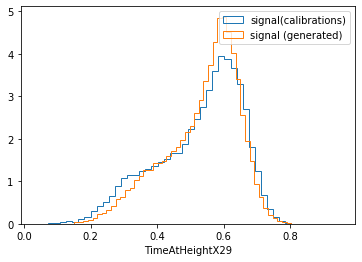

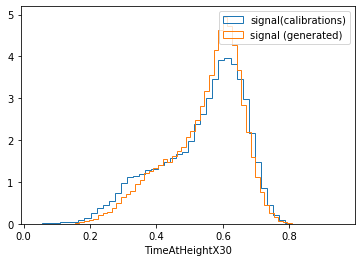

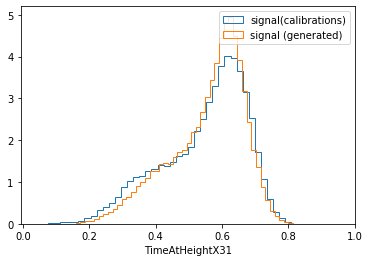

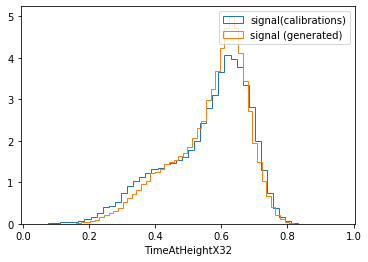

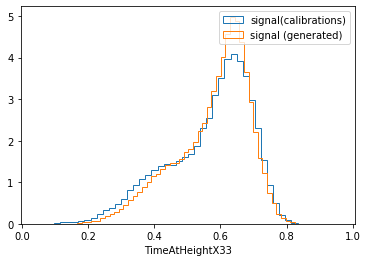

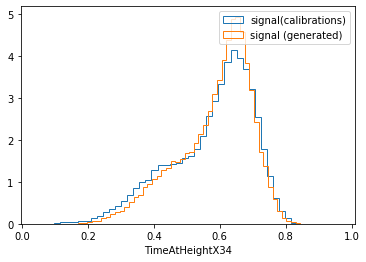

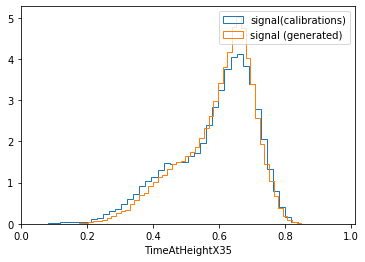

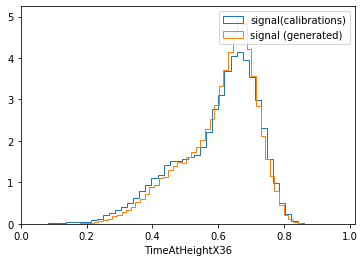

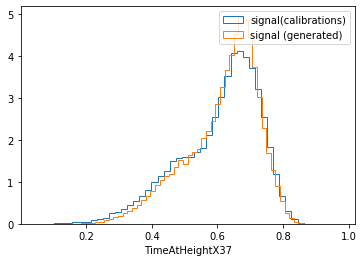

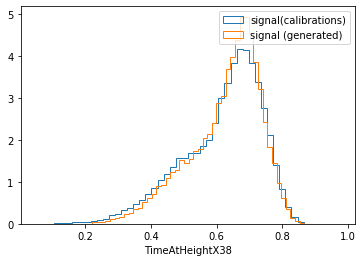

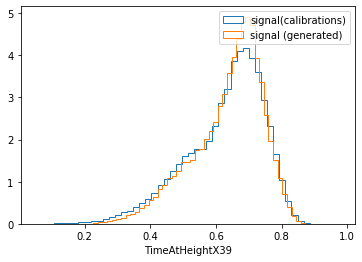

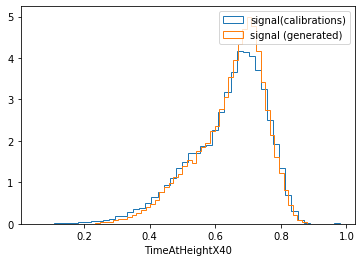

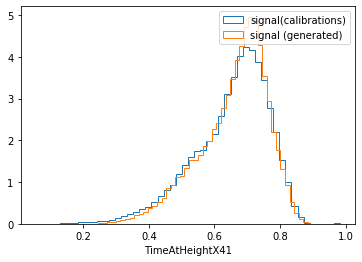

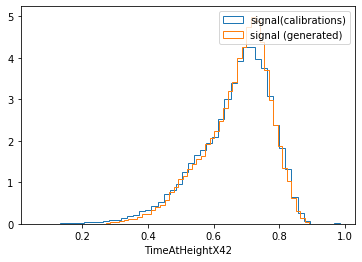

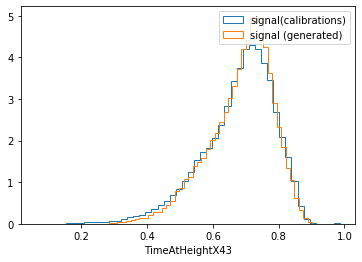

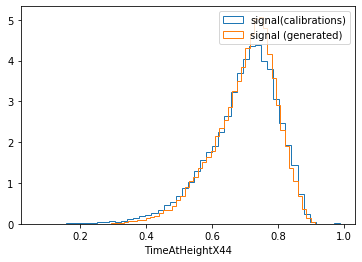

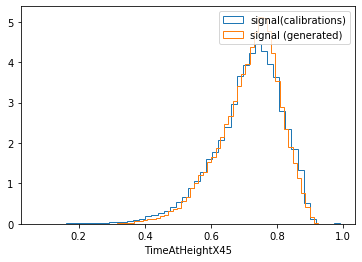

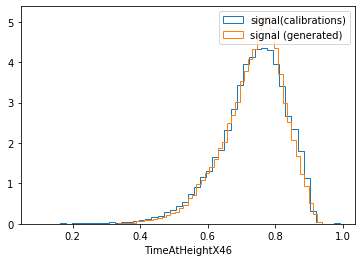

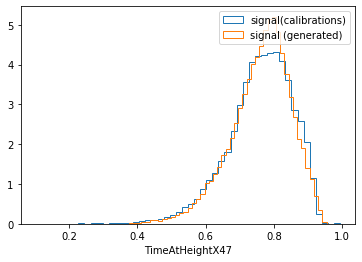

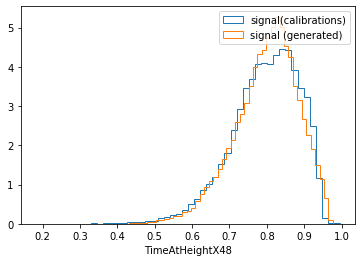

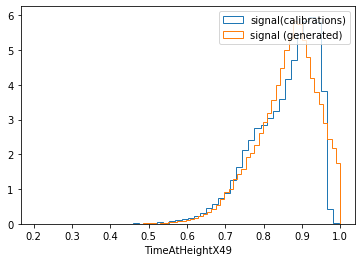

In [15]:
string = 'TimeAtHeightX'
for i in range(2,50):

    x1=sig_cal[string+str(i)]
    x2 =sig_gen[string+str(i)]

    plt.hist(x1, bins = 50, label='signal(calibrations)', histtype = 'step', density=True)
    plt.hist(x2, bins = 50, label = 'signal (generated)', histtype = 'step',density=True)
    plt.legend()
    plt.xlabel(string+str(i))
    plt.show()
    

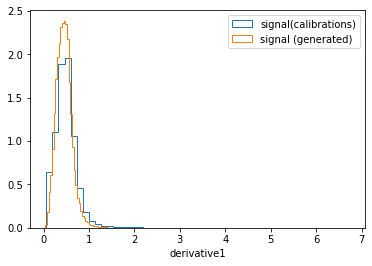

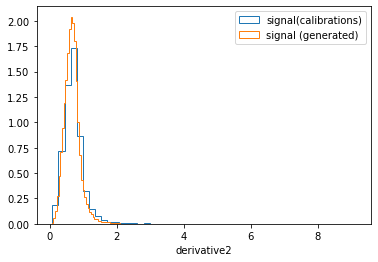

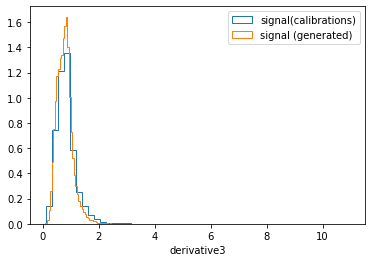

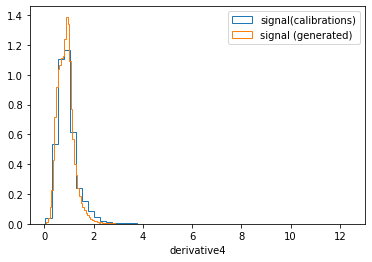

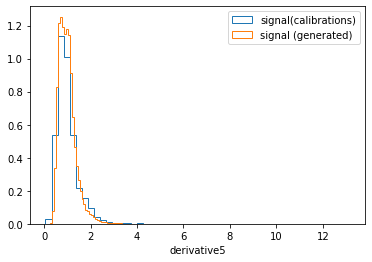

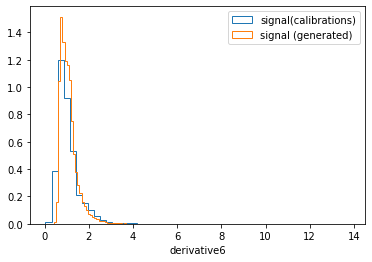

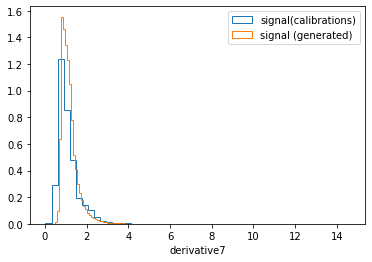

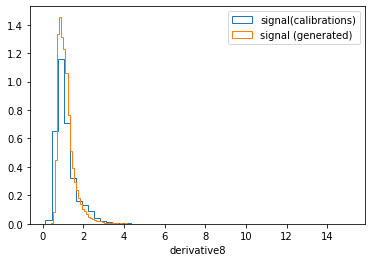

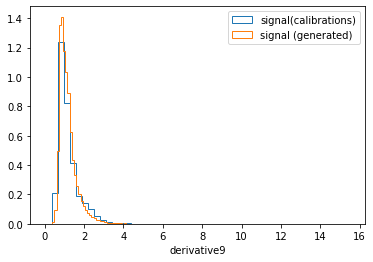

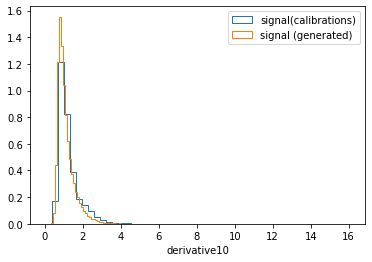

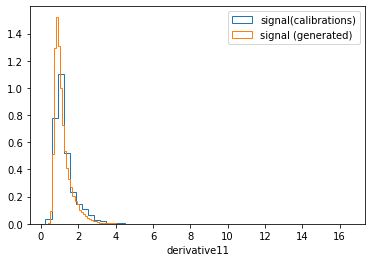

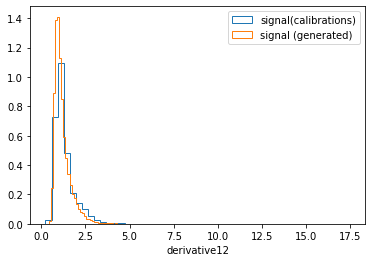

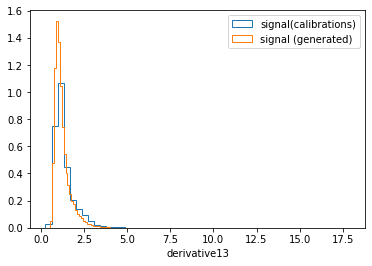

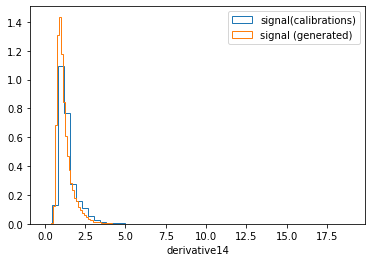

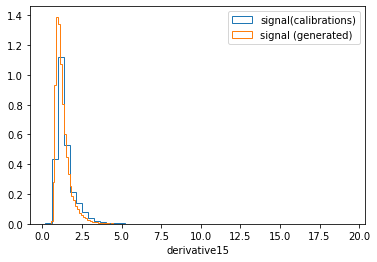

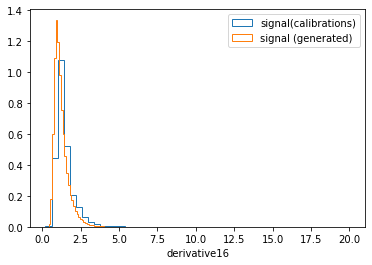

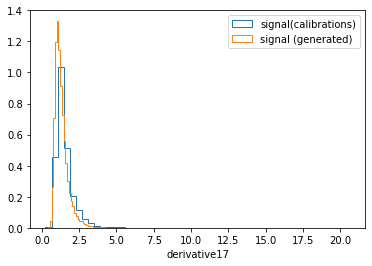

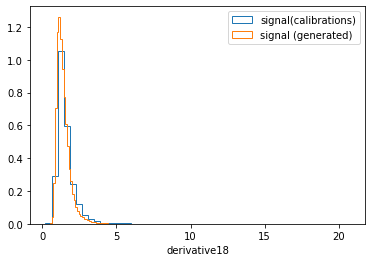

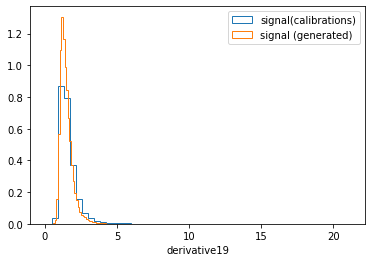

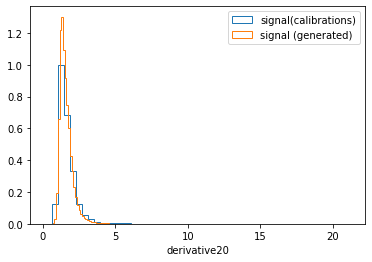

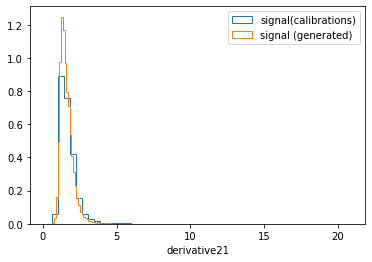

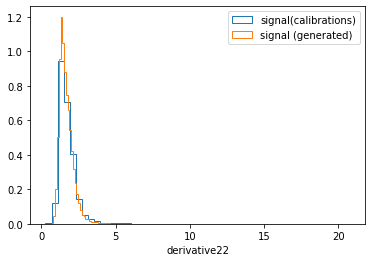

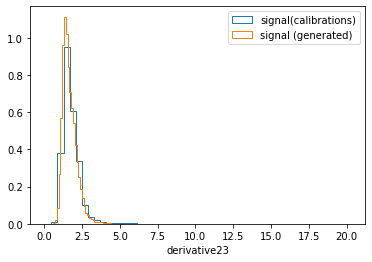

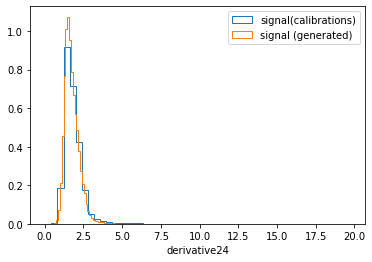

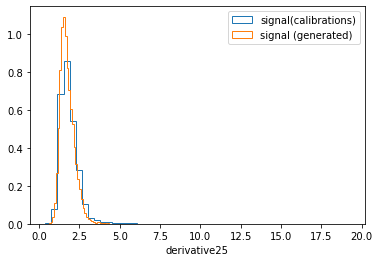

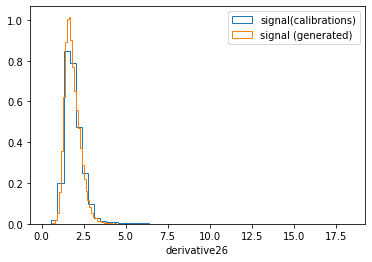

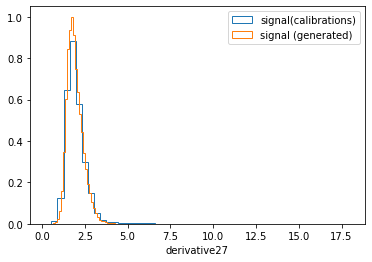

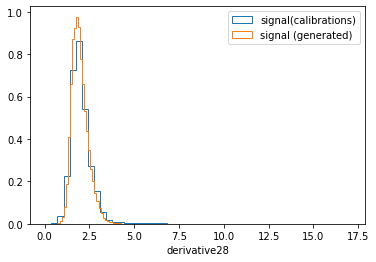

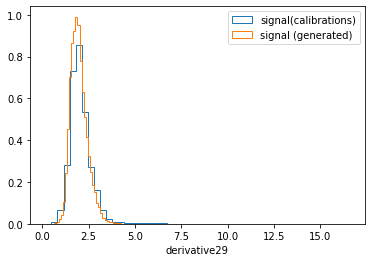

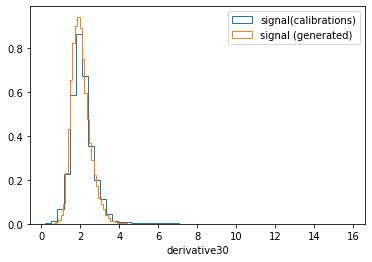

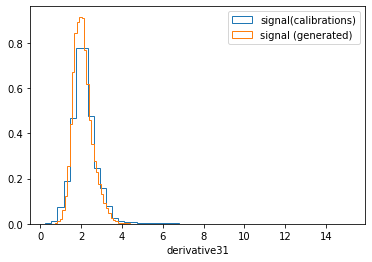

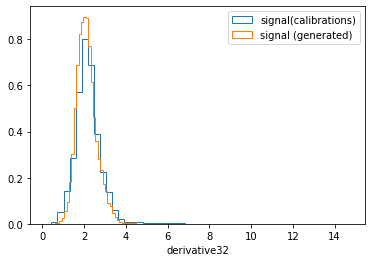

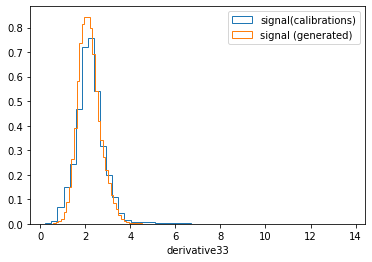

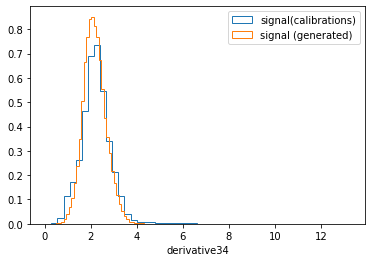

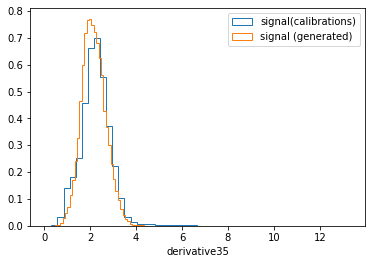

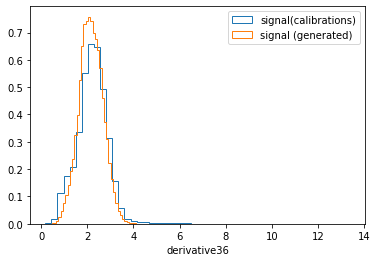

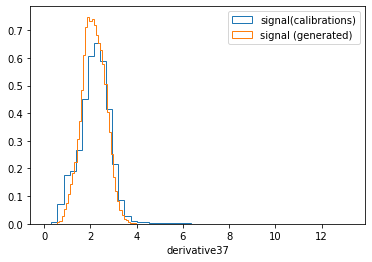

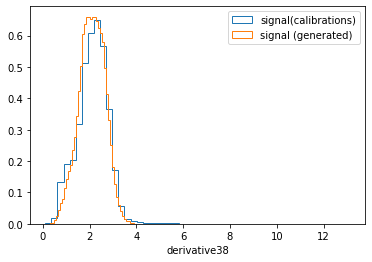

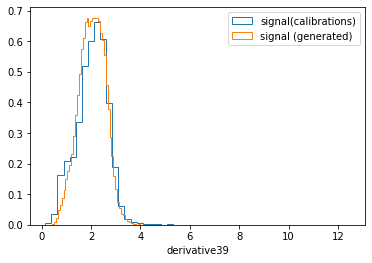

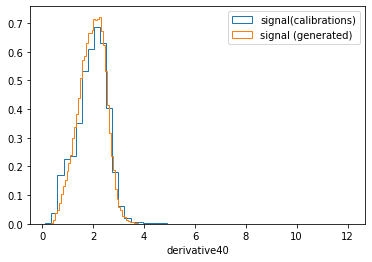

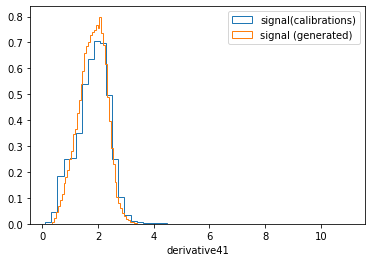

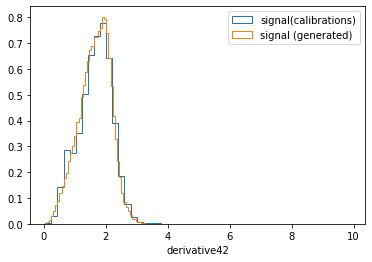

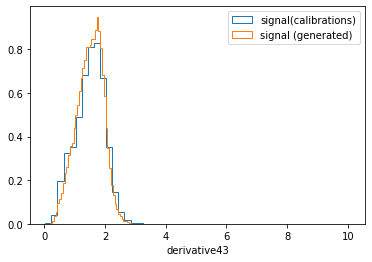

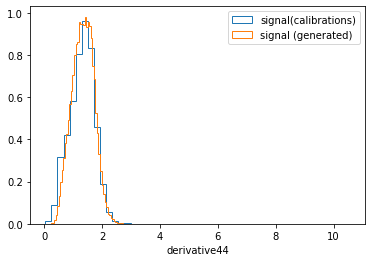

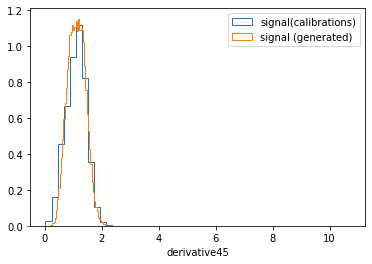

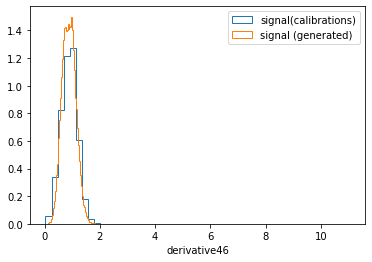

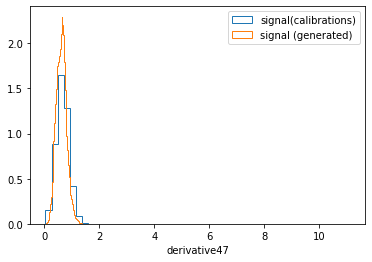

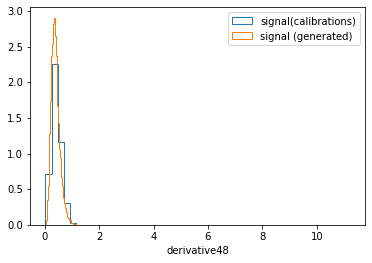

In [16]:
string = 'derivative'
for i in range(1,49):

    x1=sig_cal[string+str(i)]
    x2 =sig_gen[string+str(i)]

    plt.hist(x1, bins = 50, label='signal(calibrations)', histtype = 'step', density=True)
    plt.hist(x2, bins = 50, label = 'signal (generated)', histtype = 'step',density=True)
    plt.legend()
    plt.xlabel(string+str(i))
    plt.show()

### Background

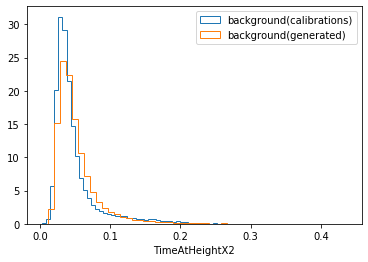

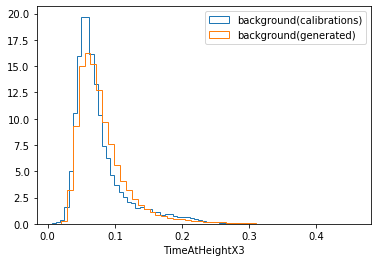

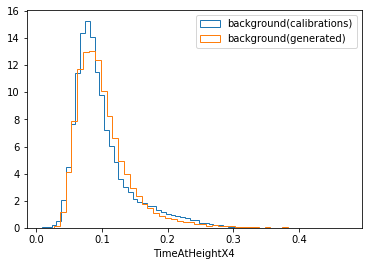

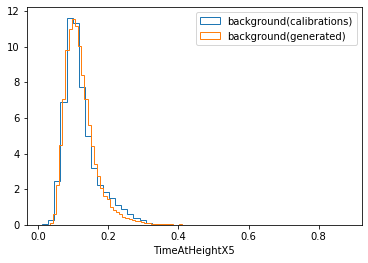

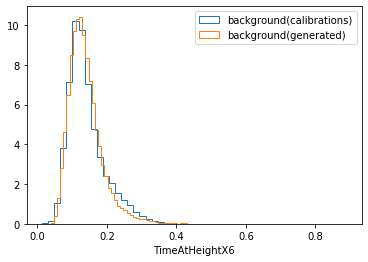

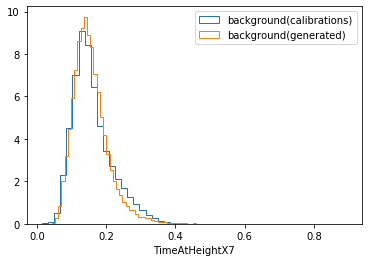

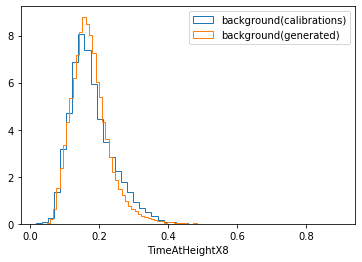

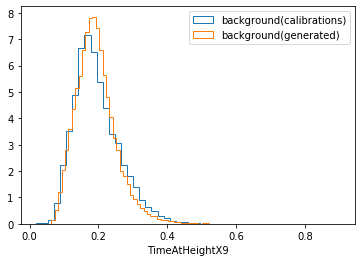

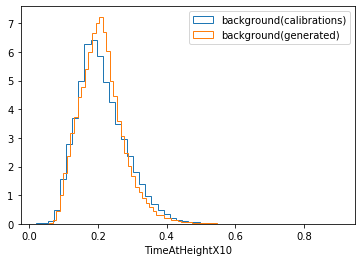

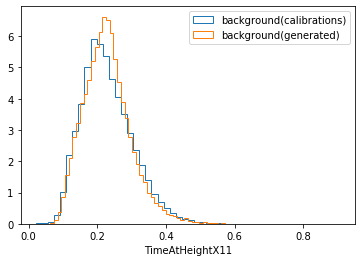

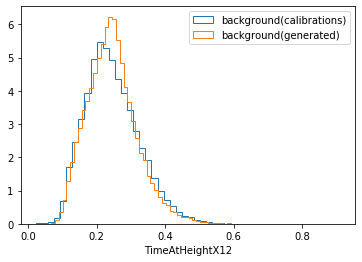

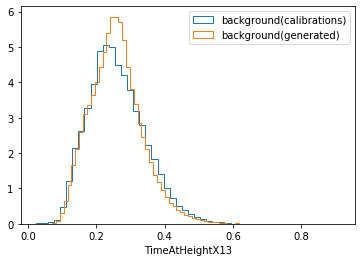

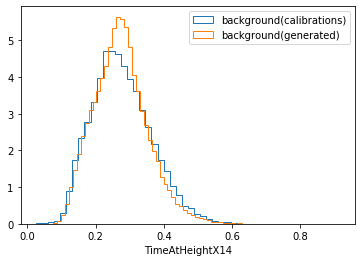

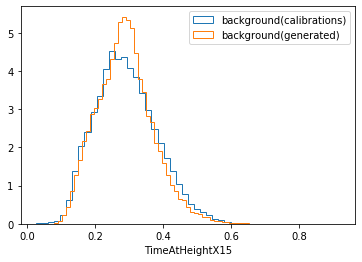

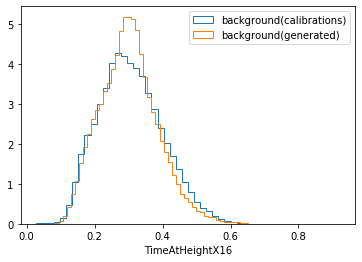

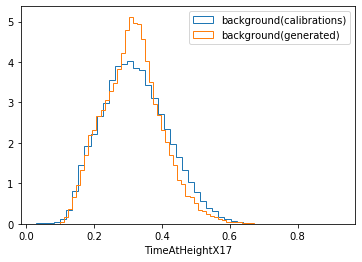

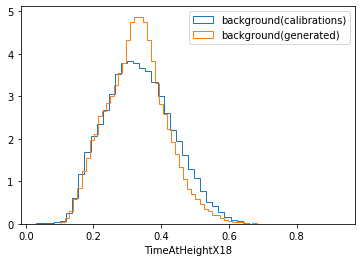

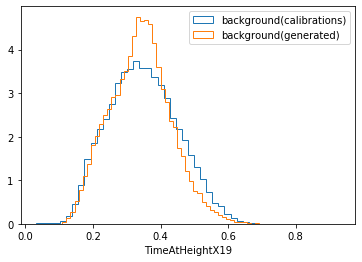

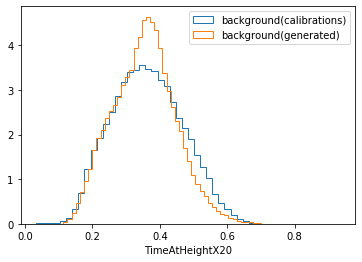

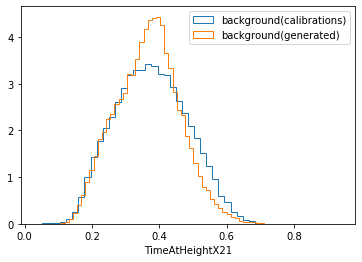

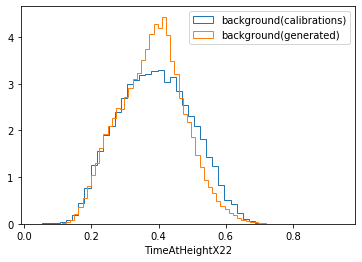

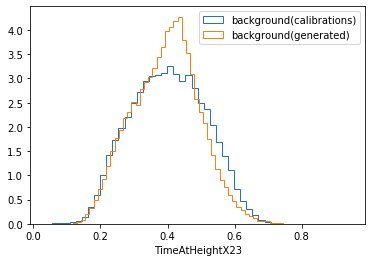

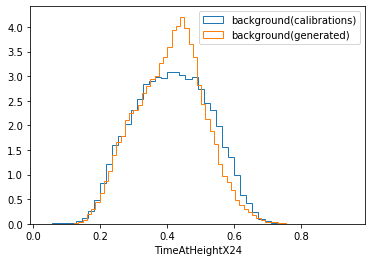

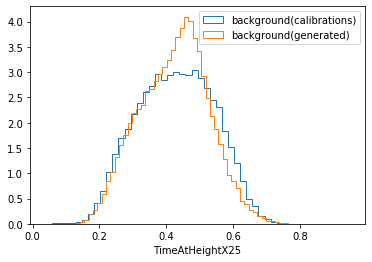

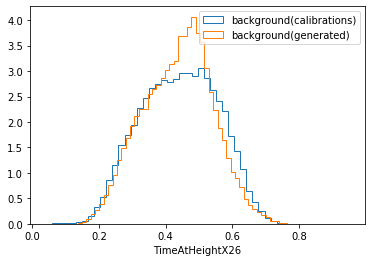

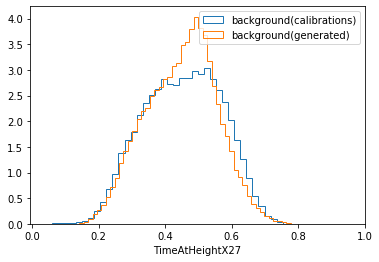

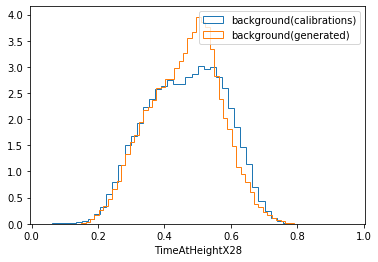

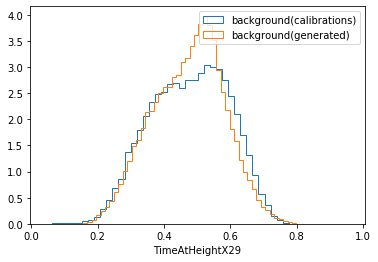

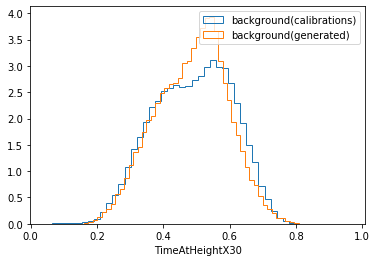

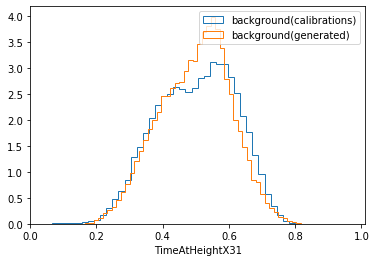

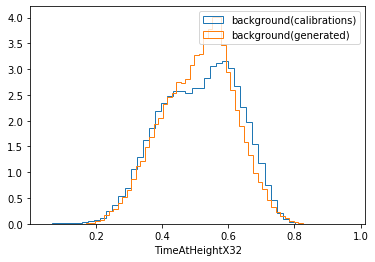

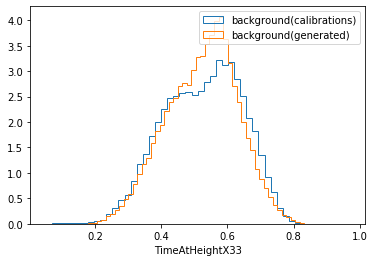

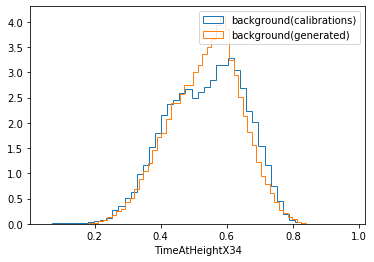

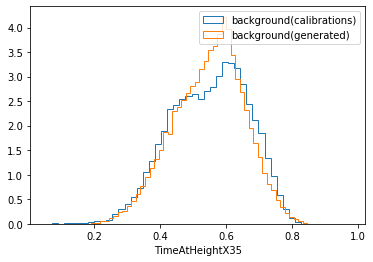

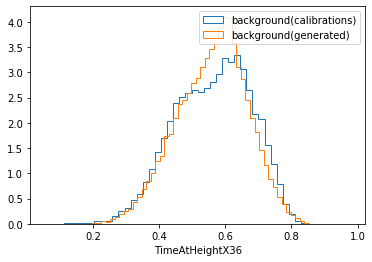

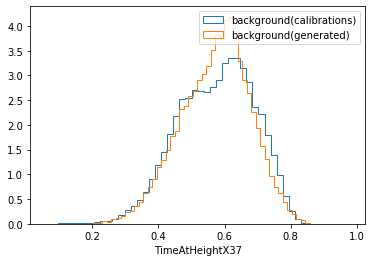

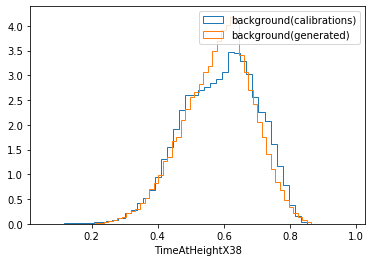

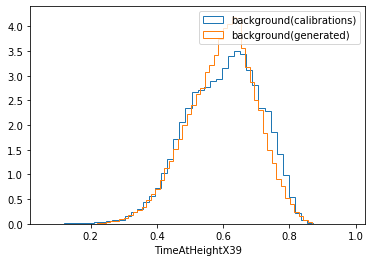

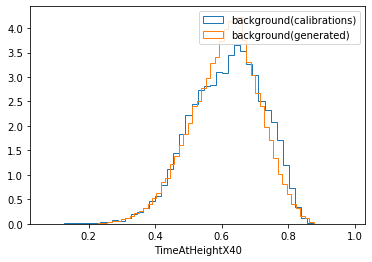

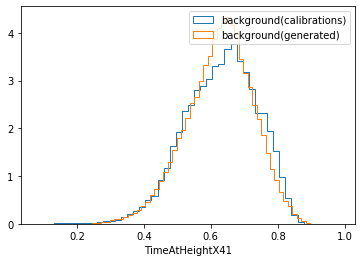

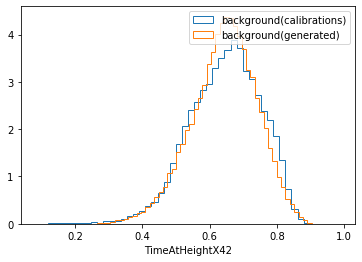

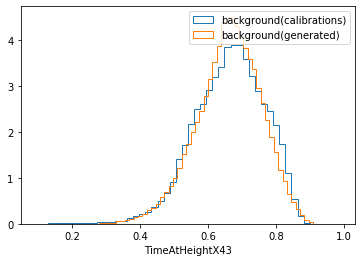

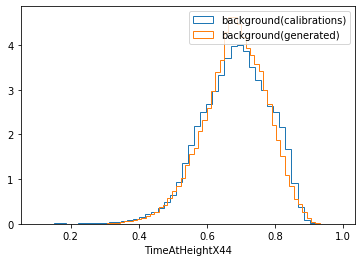

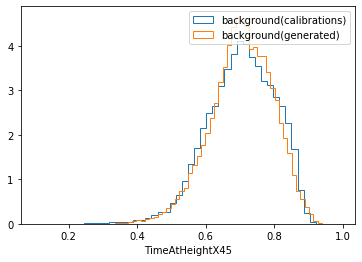

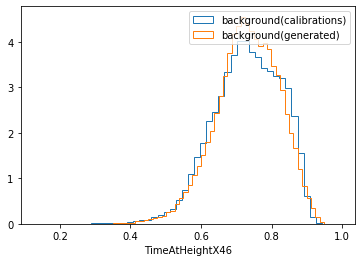

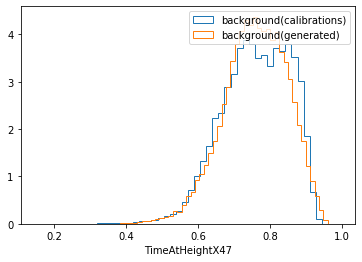

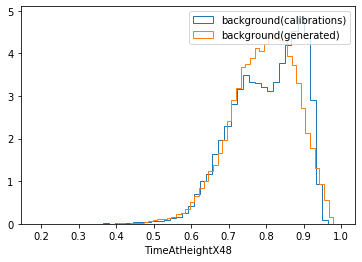

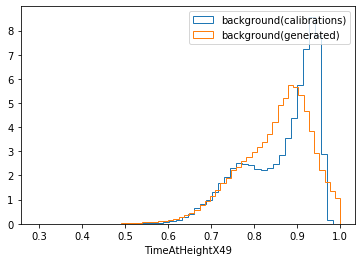

In [18]:
string = 'TimeAtHeightX'
for i in range(2,50):

    x1=bkg_cal[string+str(i)]
    x2 =bkg_gen[string+str(i)]

    plt.hist(x1, bins = 50, label='background(calibrations)', histtype = 'step', density=True)
    plt.hist(x2, bins = 50, label = 'background(generated)', histtype = 'step',density=True)
    plt.legend()
    plt.xlabel(string+str(i))
    plt.show()

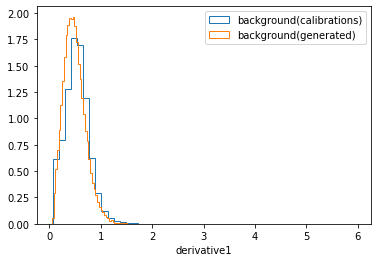

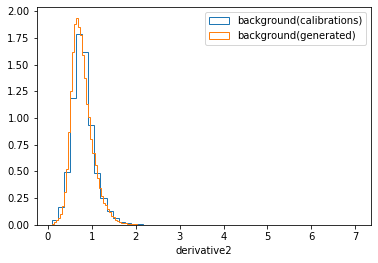

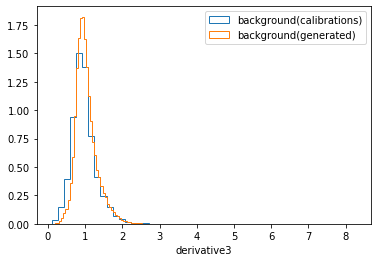

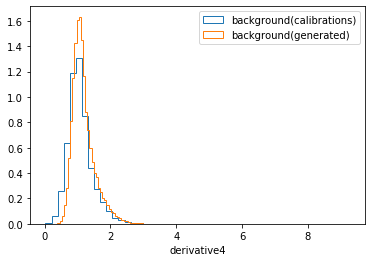

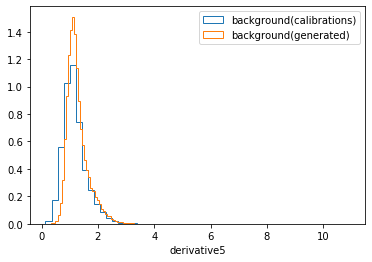

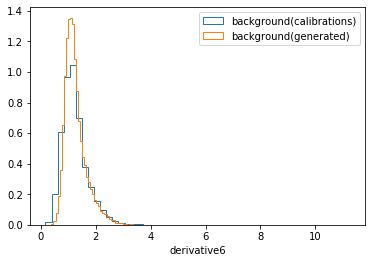

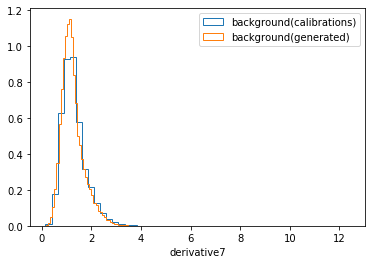

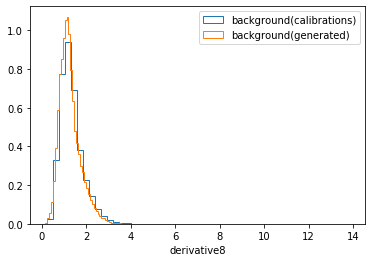

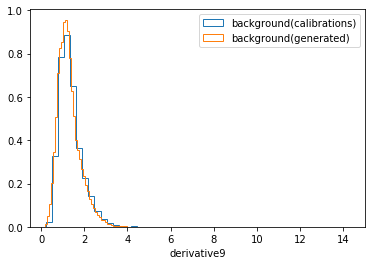

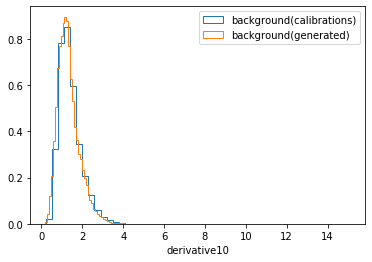

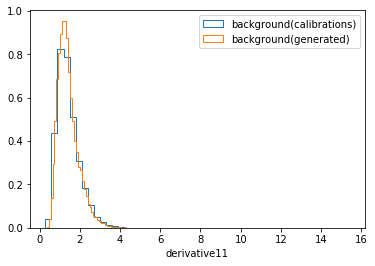

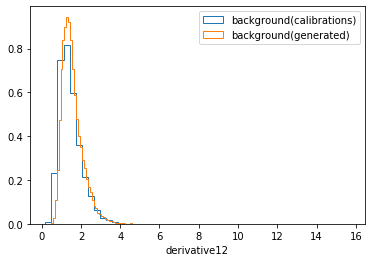

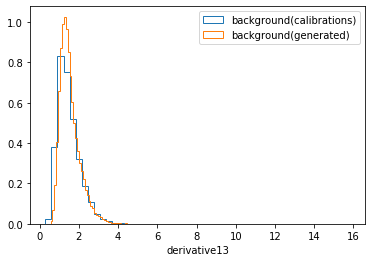

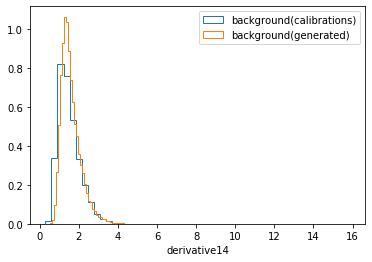

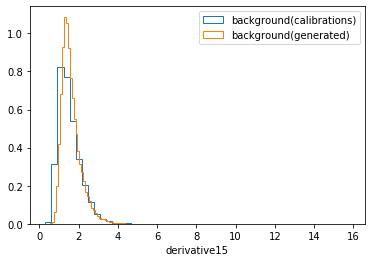

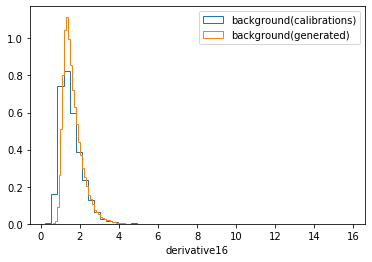

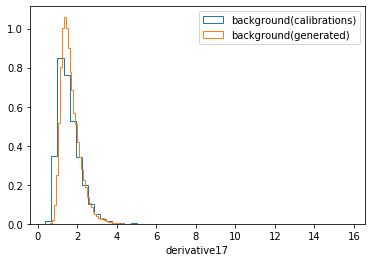

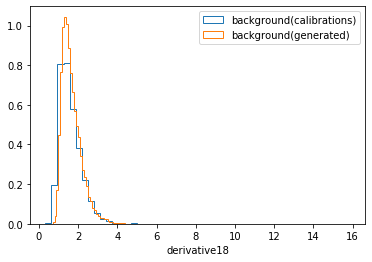

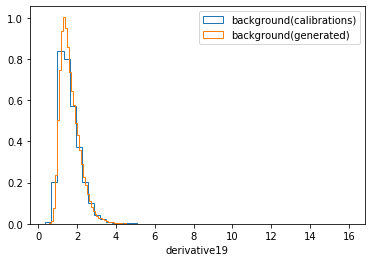

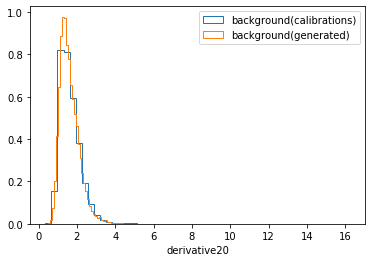

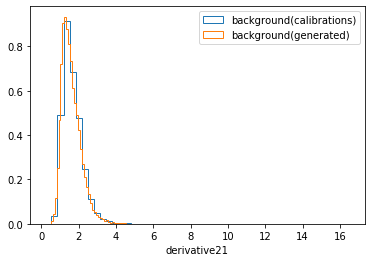

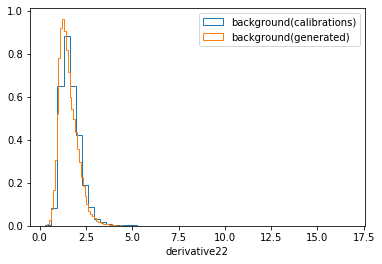

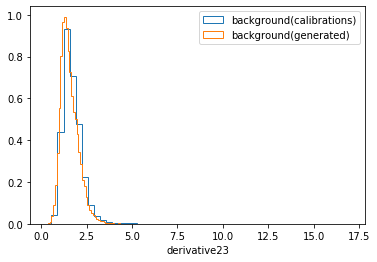

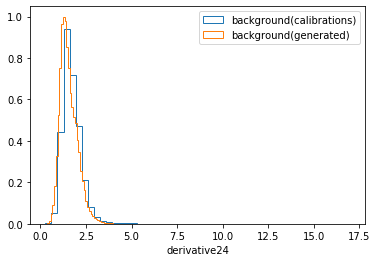

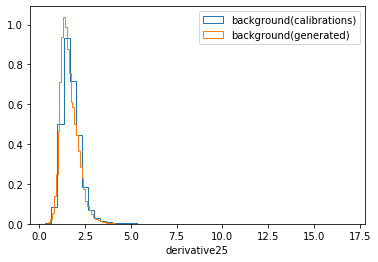

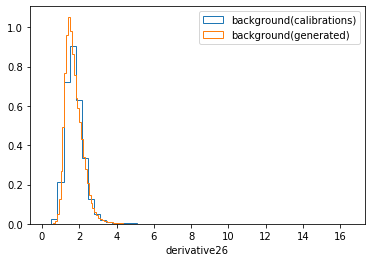

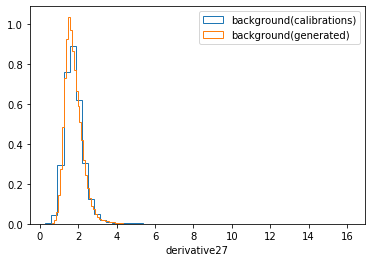

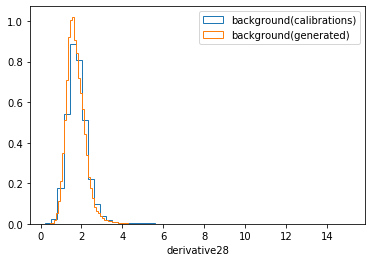

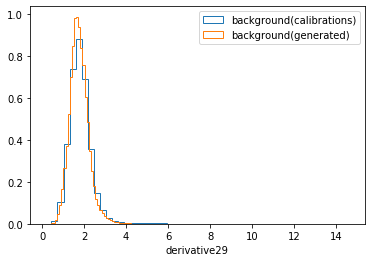

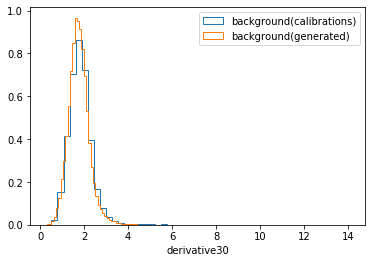

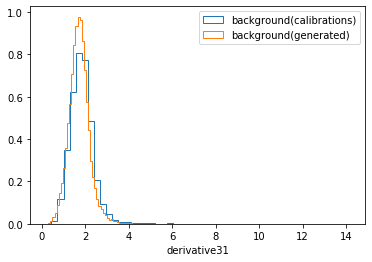

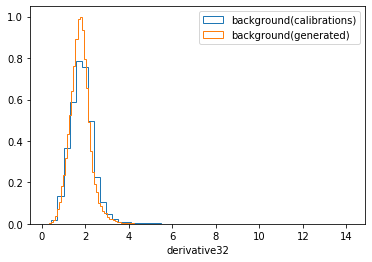

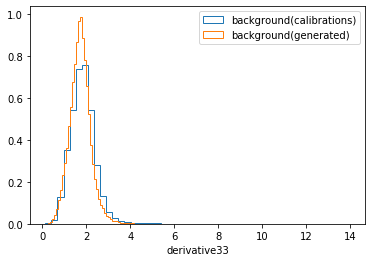

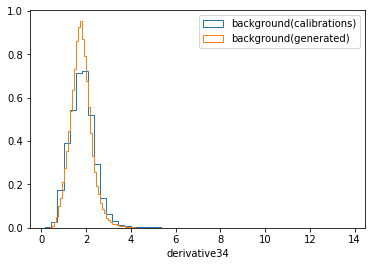

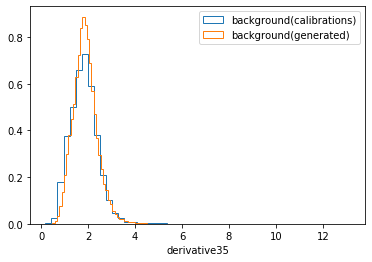

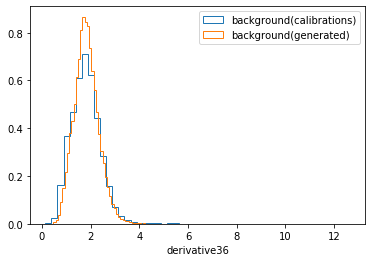

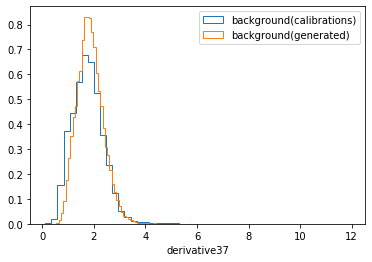

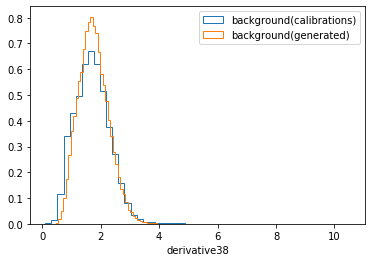

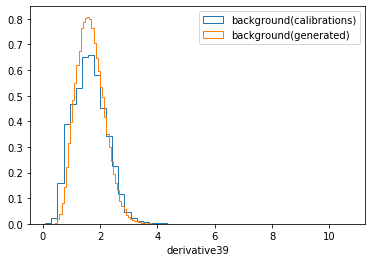

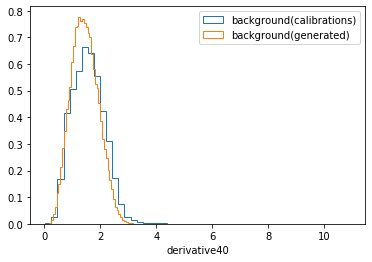

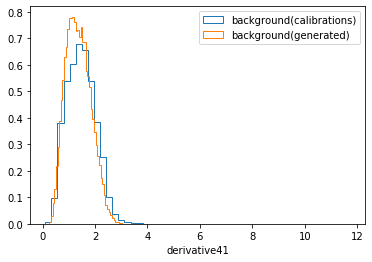

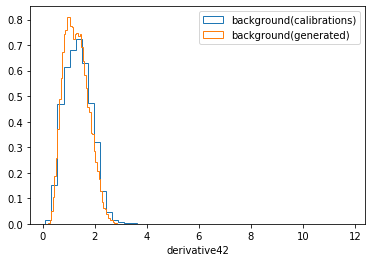

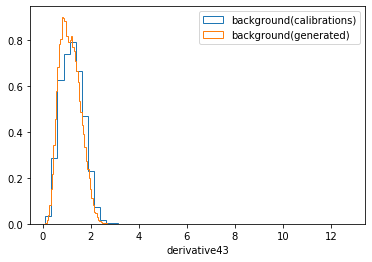

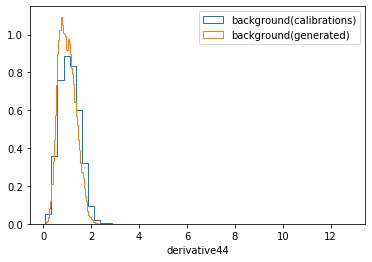

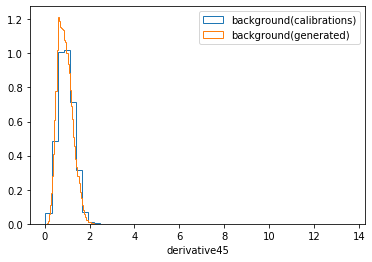

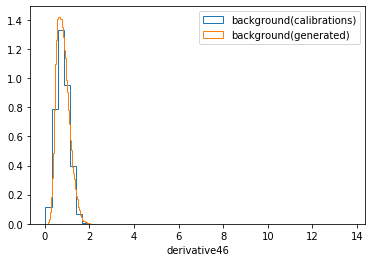

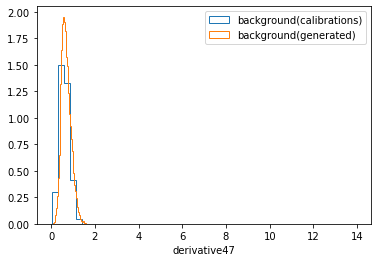

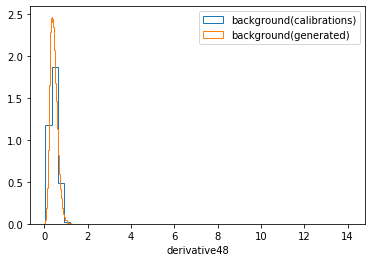

In [19]:
string = 'derivative'
for i in range(1,49):

    x1=bkg_cal[string+str(i)]
    x2 =bkg_gen[string+str(i)]

    plt.hist(x1, bins = 50, label='background(calibrations)', histtype = 'step', density=True)
    plt.hist(x2, bins = 50, label = 'background(generated)', histtype = 'step',density=True)
    plt.legend()
    plt.xlabel(string+str(i))
    plt.show()